# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df=pd.read_csv('C:/Users/aksin52/Documents/Machine Learning Express/Build a project portfolio with Machine Learning/MARKETING ANALYTICS PROJECTS/Cross Sell Personal Loan - Banking Project/Data/PL_XSELL.csv')

In [3]:
df.shape

(20000, 38)

In [4]:
df.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0


In [5]:
df.dtypes

CUST_ID                      object
TARGET                        int64
AGE                           int64
GENDER                       object
BALANCE                     float64
OCCUPATION                   object
AGE_BKT                      object
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                     object
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS              int64
AMT_OTH_BK_ATM_USG_CHGS     

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [8]:
df['CUST_ID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [9]:
df=df.drop(['CUST_ID'],axis=1)

# Defining Target and Independent Features

In [10]:
Y=df[['TARGET']]
X=df.drop(['TARGET'],axis=1)

# Get the Response Rate

In [11]:
Y.mean()

TARGET    0.1256
dtype: float64

# Split features into Numerical and Categorical

In [12]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

# Dropping the indicator features from num to build a separate DF

In [13]:
ind=num[['FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']]
num=num.drop(['FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN'],axis=1)

In [14]:
ind.shape

(20000, 4)

# Outlier Analysis of Numerical Features

In [15]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.418150,5.113622e+05,440.150300,14.955650,125.239300,12.348050,6.63370,18.97540,1.883000,1.028950,1.172450,0.411750,2.137550,10990.015000,378474.478000,1.245200e+05,237307.771646,22424.704400,7.737170e+05,1.09950,1.292000,0.042750,0.04440,7408.839731,242236.478811,25092.478384,179059.029254,20303.920406
std,9.577985,7.235930e+05,249.887582,8.642634,54.953936,12.151921,7.67583,17.75929,2.263596,1.497239,2.404246,2.009854,2.384893,15304.891499,331417.730129,4.393795e+05,319067.664858,49484.803631,7.126592e+05,14.21922,14.764201,0.203038,0.20623,7210.168619,269837.890598,49387.197536,281706.855583,46472.889982
min,21.000000,0.000000e+00,100.000000,1.000000,29.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,8.930580e+03,133.000000,1.000000,39.000000,0.000000,1.00000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.500000e+03,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,26.000000,1.925977e+04,157.000000,3.000000,49.000000,2.000000,1.00000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.042700e+04,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,6.475403e+04,227.000000,7.000000,79.000000,6.000000,2.00000,9.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2990.000000,0.000000e+00,0.000000,0.000000,2.379355e+05,0.00000,0.000000,0.000000,0.00000,0.000000,1265.450000,0.000000,0.000000,0.000000
50%,38.000000,2.316758e+05,364.000000,15.000000,125.000000,10.000000,5.00000,14.00000,1.000000,1.000000,0.000000,0.000000,2.000000,6900.000000,340150.000000,2.384000e+04,0.000000,0.000000,6.951150e+05,0.00000,0.000000,0.000000,0.00000,6000.000000,147095.000000,8645.000000,0.000000,0.000000
75%,46.000000,6.538768e+05,644.000000,22.000000,172.000000,14.000000,7.00000,21.00000,2.000000,1.000000,1.000000,0.000000,4.000000,15800.000000,674675.000000,7.247000e+04,473970.500000,0.000000,1.078927e+06,0.00000,0.000000,0.000000,0.00000,13500.000000,385000.000000,28605.000000,257699.000000,0.000000


# Capping and Flooring of outliers

In [16]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [17]:
num=num.apply(lambda x : outlier_cap(x))

In [18]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.418150,5.033852e+05,440.029350,14.955650,125.239250,12.298500,6.398000,18.606450,1.870200,0.95085,1.097950,0.262800,2.127750,10681.070000,378416.978000,1.135705e+05,237188.572739,22384.500150,7.617689e+05,0.0,0.0,0.042600,0.044350,7402.146397,242069.668811,23902.817720,178912.462972,20244.200856
std,9.577985,6.811763e+05,249.516357,8.642634,54.915204,11.924446,6.250292,15.842327,2.204744,0.83706,1.949217,0.514246,2.343396,13296.760164,331311.186181,3.458507e+05,318788.155458,49345.427144,6.453939e+05,0.0,0.0,0.201959,0.205877,7194.628202,269381.088039,41567.221576,281289.853759,46251.396616
min,21.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,8.930580e+03,133.000000,1.000000,39.000000,0.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.500000e+03,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,26.000000,1.925977e+04,157.000000,3.000000,49.000000,2.000000,1.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.042700e+04,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,6.475403e+04,227.000000,7.000000,79.000000,6.000000,2.000000,9.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2990.000000,0.000000e+00,0.000000,0.000000,2.379355e+05,0.0,0.0,0.000000,0.000000,0.000000,1265.450000,0.000000,0.000000,0.000000
50%,38.000000,2.316758e+05,364.000000,15.000000,125.000000,10.000000,5.000000,14.000000,1.000000,1.00000,0.000000,0.000000,2.000000,6900.000000,340150.000000,2.384000e+04,0.000000,0.000000,6.951150e+05,0.0,0.0,0.000000,0.000000,6000.000000,147095.000000,8645.000000,0.000000,0.000000
75%,46.000000,6.538768e+05,644.000000,22.000000,172.000000,14.000000,7.000000,21.000000,2.000000,1.00000,1.000000,0.000000,4.000000,15800.000000,674675.000000,7.247000e+04,473970.500000,0.000000,1.078927e+06,0.0,0.0,0.000000,0.000000,13500.000000,385000.000000,28605.000000,257699.000000,0.000000


# Missing Value Analysis

In [19]:
num.isnull().mean()

AGE                         0.0
BALANCE                     0.0
SCR                         0.0
HOLDING_PERIOD              0.0
LEN_OF_RLTN_IN_MNTH         0.0
NO_OF_L_CR_TXNS             0.0
NO_OF_L_DR_TXNS             0.0
TOT_NO_OF_L_TXNS            0.0
NO_OF_BR_CSH_WDL_DR_TXNS    0.0
NO_OF_ATM_DR_TXNS           0.0
NO_OF_NET_DR_TXNS           0.0
NO_OF_MOB_DR_TXNS           0.0
NO_OF_CHQ_DR_TXNS           0.0
AMT_ATM_DR                  0.0
AMT_BR_CSH_WDL_DR           0.0
AMT_CHQ_DR                  0.0
AMT_NET_DR                  0.0
AMT_MOB_DR                  0.0
AMT_L_DR                    0.0
AMT_OTH_BK_ATM_USG_CHGS     0.0
AMT_MIN_BAL_NMC_CHGS        0.0
NO_OF_IW_CHQ_BNC_TXNS       0.0
NO_OF_OW_CHQ_BNC_TXNS       0.0
AVG_AMT_PER_ATM_TXN         0.0
AVG_AMT_PER_CSH_WDL_TXN     0.0
AVG_AMT_PER_CHQ_TXN         0.0
AVG_AMT_PER_NET_TXN         0.0
AVG_AMT_PER_MOB_TXN         0.0
dtype: float64

In [20]:
# Since the data does not contain any missing values Imputation Processes are not required

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [21]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [22]:
num_1.iloc[0]

AGE                             27.00
BALANCE                       3383.75
SCR                            776.00
HOLDING_PERIOD                  30.00
LEN_OF_RLTN_IN_MNTH            146.00
NO_OF_L_CR_TXNS                  7.00
NO_OF_L_DR_TXNS                  3.00
TOT_NO_OF_L_TXNS                10.00
NO_OF_BR_CSH_WDL_DR_TXNS         0.00
NO_OF_ATM_DR_TXNS                1.00
NO_OF_NET_DR_TXNS                2.00
NO_OF_MOB_DR_TXNS                0.00
NO_OF_CHQ_DR_TXNS                0.00
AMT_ATM_DR                   13100.00
AMT_BR_CSH_WDL_DR                0.00
AMT_CHQ_DR                       0.00
AMT_NET_DR                  973557.00
AMT_MOB_DR                       0.00
AMT_L_DR                    986657.00
NO_OF_IW_CHQ_BNC_TXNS            0.00
NO_OF_OW_CHQ_BNC_TXNS            0.00
AVG_AMT_PER_ATM_TXN          13100.00
AVG_AMT_PER_CSH_WDL_TXN          0.00
AVG_AMT_PER_CHQ_TXN              0.00
AVG_AMT_PER_NET_TXN         486778.50
AVG_AMT_PER_MOB_TXN              0.00
Name: 0, dty

# Part 1 - Bi Variate Analysis (Feature Discretization)

In [23]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,AGE_Rank,BALANCE_Rank,SCR_Rank,HOLDING_PERIOD_Rank,LEN_OF_RLTN_IN_MNTH_Rank,NO_OF_L_CR_TXNS_Rank,NO_OF_L_DR_TXNS_Rank,TOT_NO_OF_L_TXNS_Rank,NO_OF_BR_CSH_WDL_DR_TXNS_Rank,NO_OF_ATM_DR_TXNS_Rank,NO_OF_NET_DR_TXNS_Rank,NO_OF_MOB_DR_TXNS_Rank,NO_OF_CHQ_DR_TXNS_Rank,AMT_ATM_DR_Rank,AMT_BR_CSH_WDL_DR_Rank,AMT_CHQ_DR_Rank,AMT_NET_DR_Rank,AMT_MOB_DR_Rank,AMT_L_DR_Rank,NO_OF_IW_CHQ_BNC_TXNS_Rank,NO_OF_OW_CHQ_BNC_TXNS_Rank,AVG_AMT_PER_ATM_TXN_Rank,AVG_AMT_PER_CSH_WDL_TXN_Rank,AVG_AMT_PER_CHQ_TXN_Rank,AVG_AMT_PER_NET_TXN_Rank,AVG_AMT_PER_MOB_TXN_Rank
0,1.0,0.0,8.0,9.0,6.0,4.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0
1,7.0,5.0,4.0,9.0,3.0,4.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0
2,5.0,0.0,7.0,0.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0,0.0,2.0,3.0,4.0,2.0,4.0,0.0,9.0,0.0,0.0,3.0,6.0,3.0,4.0,0.0
3,9.0,2.0,1.0,4.0,4.0,9.0,7.0,9.0,4.0,2.0,1.0,1.0,4.0,5.0,5.0,2.0,3.0,1.0,9.0,0.0,0.0,4.0,3.0,1.0,2.0,1.0
4,4.0,9.0,1.0,8.0,8.0,8.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


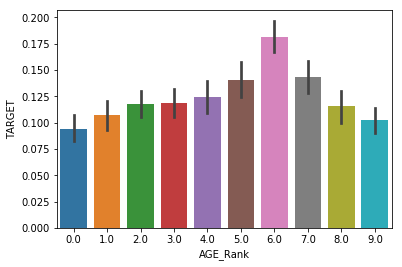

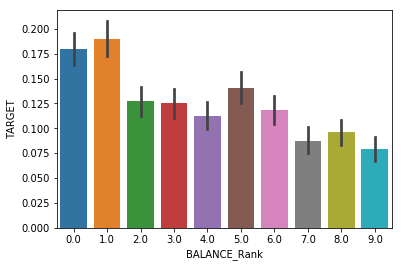

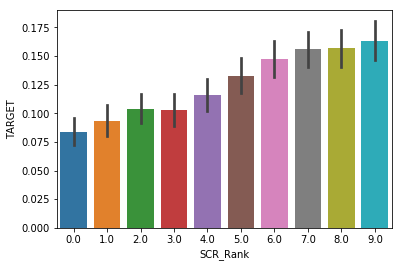

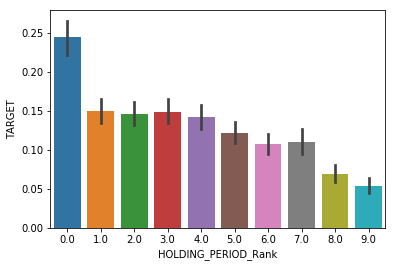

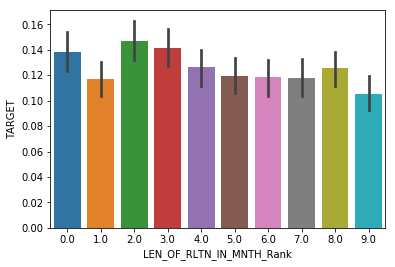

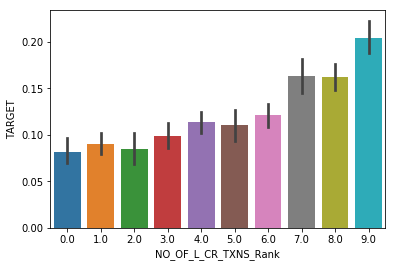

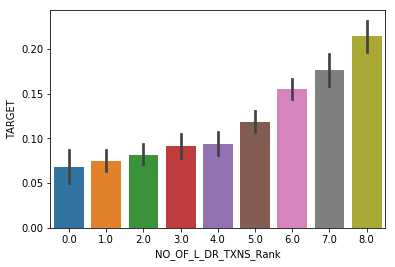

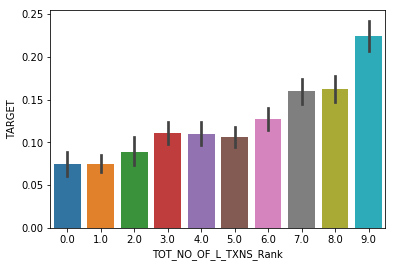

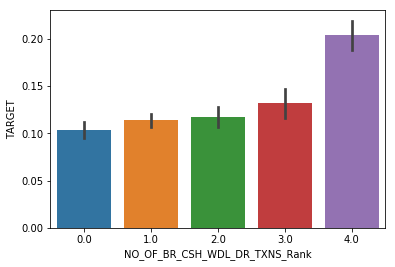

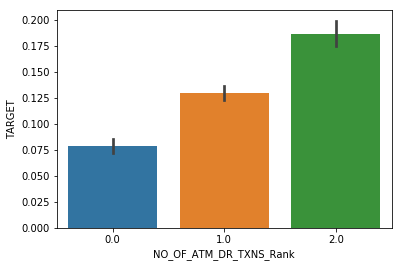

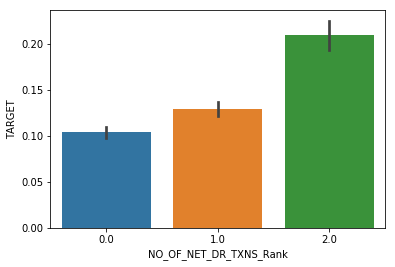

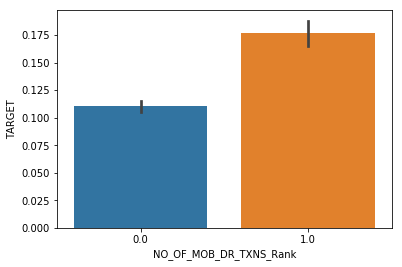

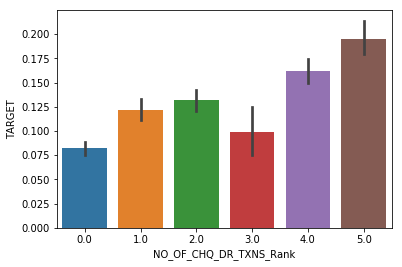

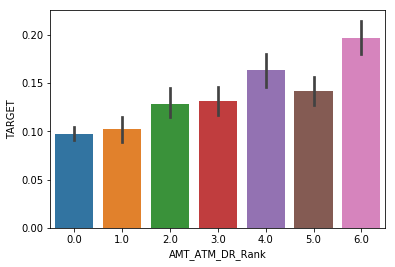

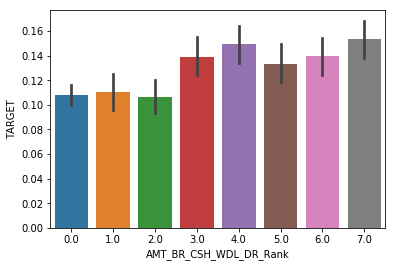

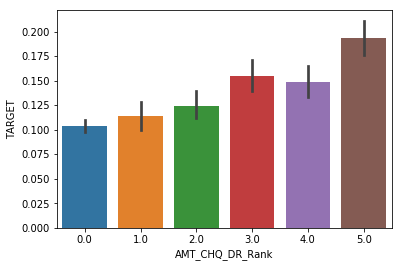

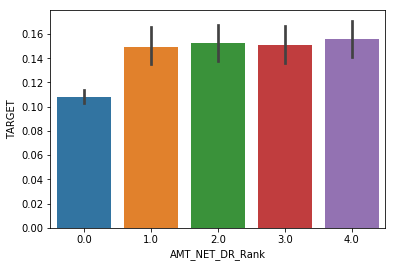

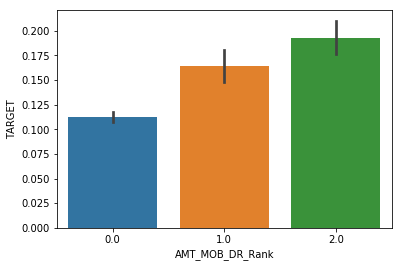

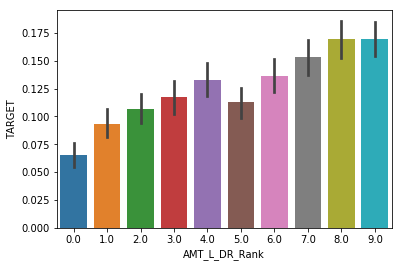

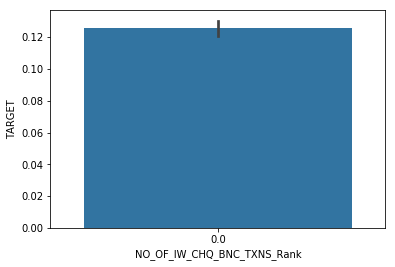

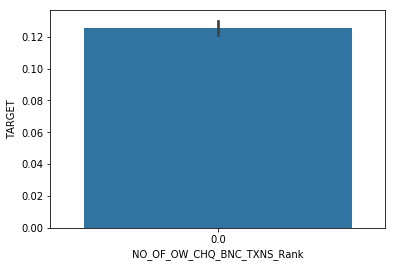

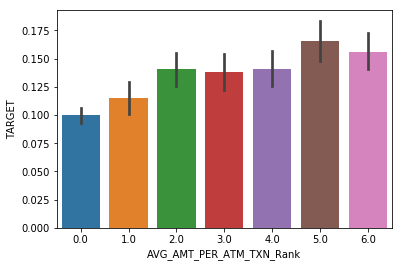

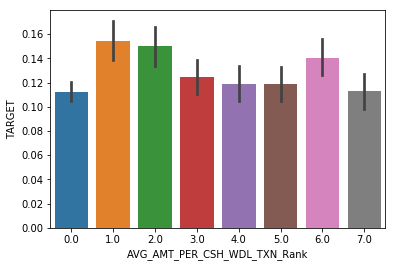

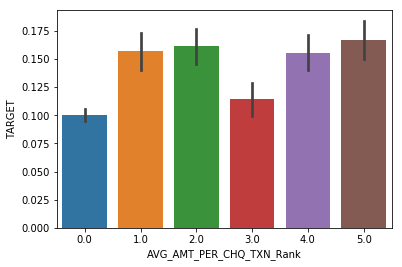

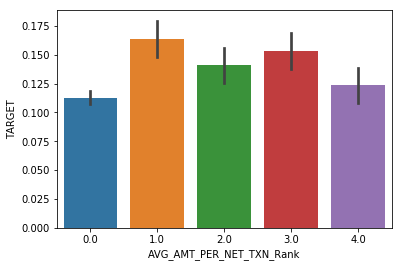

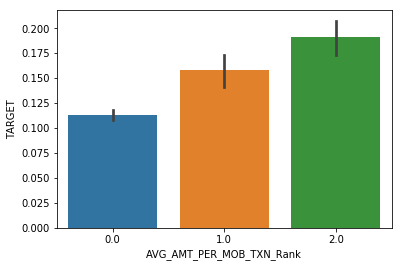

In [24]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="TARGET",data=X_bin_combined, estimator=mean )
plt.show()

In [25]:
num_varlist=['AVG_AMT_PER_NET_TXN','AVG_AMT_PER_CHQ_TXN','AVG_AMT_PER_CSH_WDL_TXN','NO_OF_CHQ_DR_TXNS',
             'AMT_NET_DR','AMT_BR_CSH_WDL_DR','AGE']
num_1=num_1.drop(num_varlist,axis=1)

In [26]:
num_1.shape

(20000, 19)

# Part 2 - Select K Best

In [27]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=17)
selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [28]:
select_features_df_num.iloc[0]

BALANCE                       3383.75
SCR                            776.00
HOLDING_PERIOD                  30.00
LEN_OF_RLTN_IN_MNTH            146.00
NO_OF_L_CR_TXNS                  7.00
NO_OF_L_DR_TXNS                  3.00
TOT_NO_OF_L_TXNS                10.00
NO_OF_BR_CSH_WDL_DR_TXNS         0.00
NO_OF_ATM_DR_TXNS                1.00
NO_OF_NET_DR_TXNS                2.00
NO_OF_MOB_DR_TXNS                0.00
AMT_ATM_DR                   13100.00
AMT_CHQ_DR                       0.00
AMT_MOB_DR                       0.00
AMT_L_DR                    986657.00
AVG_AMT_PER_ATM_TXN          13100.00
AVG_AMT_PER_MOB_TXN              0.00
Name: 0, dtype: float64

# Feature Selection - Categorical Features 

In [29]:
char.dtypes

GENDER        object
OCCUPATION    object
AGE_BKT       object
ACC_TYPE      object
dtype: object

# Part 1 - Bi Variate Analysis

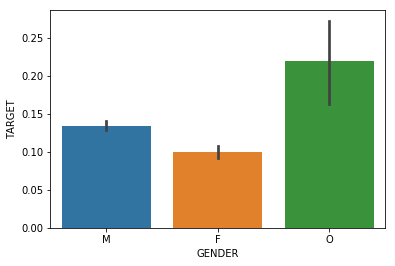

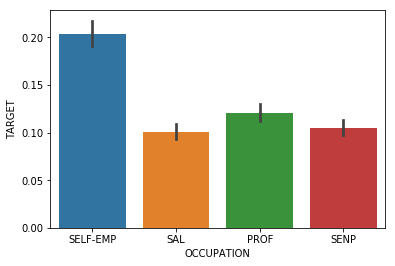

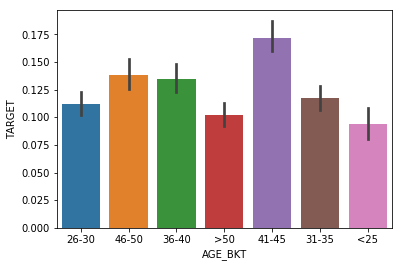

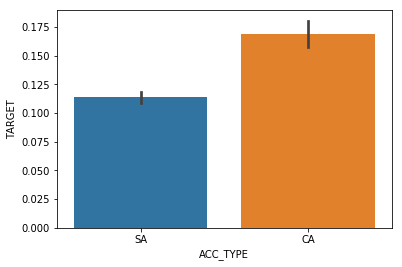

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="TARGET",data=X_char_merged, estimator=mean )
plt.show()

In [31]:
char=char.drop(['GENDER'],axis=1)

In [32]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(20000, 10)

# Part 2 - Select K Best

In [33]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=6)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [34]:
select_features_df_char.iloc[0]

OCCUPATION_SAL         0
OCCUPATION_SELF-EMP    1
OCCUPATION_SENP        0
AGE_BKT_41-45          0
AGE_BKT_<25            0
ACC_TYPE_SA            1
Name: 0, dtype: uint8

# Feature Selection - Numerical Indicator Features 

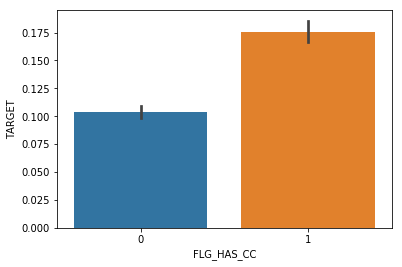

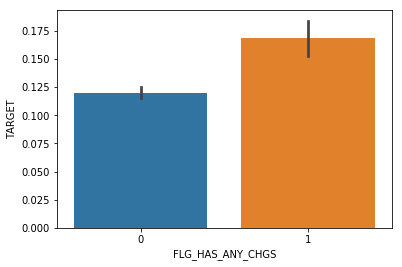

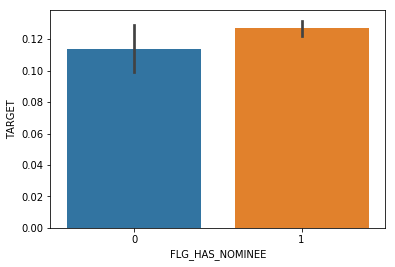

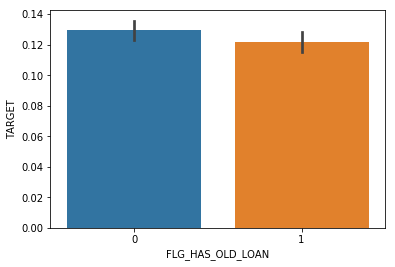

In [35]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="TARGET",data=X_ind_merged, estimator=mean )
plt.show()

In [36]:
select_features_df_ind=ind.drop(['FLG_HAS_OLD_LOAN','FLG_HAS_NOMINEE'],axis=1)

# Creating the Master Feature Set for Model Development

In [37]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [38]:
Y['TARGET'].value_counts()

0    17488
1     2512
Name: TARGET, dtype: int64

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [40]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (14000, 23)
Shape of Testing Data (6000, 23)
Response Rate in Training Data TARGET    0.127286
dtype: float64
Response Rate in Testing Data TARGET    0.121667
dtype: float64


In [41]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [42]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [44]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [140,280,420,560,700] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 140}


In [45]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=140)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=140, random_state=0)

In [46]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=140)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=140, random_state=0)

In [47]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=5,min_samples_split=140)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=140,
                           random_state=0)

In [48]:
# Model Evaluation

y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)


In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [50]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.88
Precision 0.5423728813559322
Recall 0.08767123287671233
f1_score 0.15094339622641512


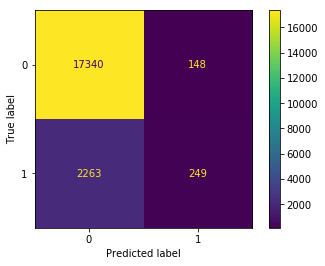

In [51]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [52]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.879
Precision 1.0
Recall 0.005479452054794521
f1_score 0.010899182561307902


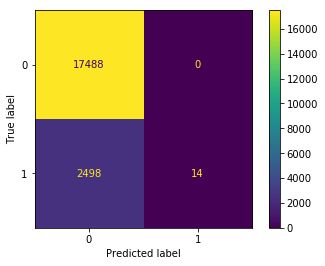

In [53]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9001666666666667
Precision 0.8700564971751412
Recall 0.21095890410958903
f1_score 0.3395810363836825


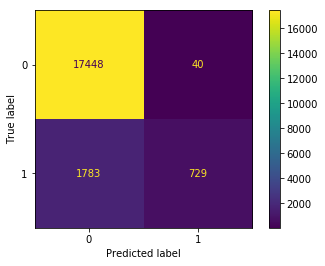

In [55]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [56]:
# Lorenz Curve

In [57]:
# Decsion Tree Lorenz Curve

In [58]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_dtree')['TARGET'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_dtree')['y_pred_P'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_dtree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_dtree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.7575,0.480444,1515.0,1515.0,0.603105,0.603105,485.0,485.0,0.027733,0.027733,0.5754,0.1,0.1,1
1,9,2000,0.2330,0.209282,466.0,1981.0,0.185510,0.788615,1534.0,2019.0,0.087717,0.115451,0.6732,0.1,0.2,2
2,8,2000,0.1155,0.139913,231.0,2212.0,0.091959,0.880573,1769.0,3788.0,0.101155,0.216606,0.6640,0.1,0.3,3
3,7,2000,0.0475,0.107465,95.0,2307.0,0.037818,0.918392,1905.0,5693.0,0.108932,0.325538,0.5929,0.1,0.4,4
4,6,2000,0.0315,0.087409,63.0,2370.0,0.025080,0.943471,1937.0,7630.0,0.110762,0.436299,0.5072,0.1,0.5,5
5,5,2000,0.0290,0.072878,58.0,2428.0,0.023089,0.966561,1942.0,9572.0,0.111048,0.547347,0.4192,0.1,0.6,6
6,4,2000,0.0140,0.059338,28.0,2456.0,0.011146,0.977707,1972.0,11544.0,0.112763,0.660110,0.3176,0.1,0.7,7
7,3,2000,0.0125,0.047381,25.0,2481.0,0.009952,0.987659,1975.0,13519.0,0.112935,0.773044,0.2146,0.1,0.8,8
8,2,2000,0.0135,0.036607,27.0,2508.0,0.010748,0.998408,1973.0,15492.0,0.112820,0.885865,0.1125,0.1,0.9,9
9,1,2000,0.0020,0.023678,4.0,2512.0,0.001592,1.000000,1996.0,17488.0,0.114135,1.000000,0.0000,0.1,1.0,10


In [74]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['TARGET'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.3450,0.357651,690.0,690.0,0.274682,0.274682,1310.0,1310.0,0.074909,0.074909,0.1998,0.1,0.1,1
1,9,2000,0.1910,0.193321,382.0,1072.0,0.152070,0.426752,1618.0,2928.0,0.092521,0.167429,0.2593,0.1,0.2,2
2,8,2000,0.1510,0.159481,302.0,1374.0,0.120223,0.546975,1698.0,4626.0,0.097095,0.264524,0.2825,0.1,0.3,3
3,7,2000,0.1235,0.119288,247.0,1621.0,0.098328,0.645303,1753.0,6379.0,0.100240,0.364764,0.2805,0.1,0.4,4
4,6,2000,0.0995,0.109414,199.0,1820.0,0.079220,0.724522,1801.0,8180.0,0.102985,0.467749,0.2568,0.1,0.5,5
5,5,2000,0.1045,0.102485,209.0,2029.0,0.083201,0.807723,1791.0,9971.0,0.102413,0.570162,0.2376,0.1,0.6,6
6,4,2000,0.1050,0.097561,210.0,2239.0,0.083599,0.891322,1790.0,11761.0,0.102356,0.672518,0.2188,0.1,0.7,7
7,3,2000,0.0640,0.065932,128.0,2367.0,0.050955,0.942277,1872.0,13633.0,0.107045,0.779563,0.1627,0.1,0.8,8
8,2,2000,0.0505,0.050649,101.0,2468.0,0.040207,0.982484,1899.0,15532.0,0.108589,0.888152,0.0943,0.1,0.9,9
9,1,2000,0.0220,0.018299,44.0,2512.0,0.017516,1.000000,1956.0,17488.0,0.111848,1.000000,0.0000,0.1,1.0,10


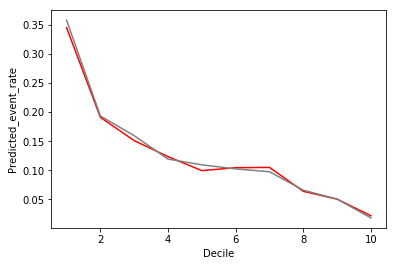

In [76]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [61]:
#df.groupby('P_Rank_RF')['y_pred_P'].agg(['min','max'])

In [62]:
# Random Forest Lorenz Curve

In [77]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['TARGET'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.4345,0.259943,869.0,869.0,0.345939,0.345939,1131.0,1131.0,0.064673,0.064673,0.2813,0.1,0.1,1
1,9,2000,0.2150,0.181004,430.0,1299.0,0.171178,0.517118,1570.0,2701.0,0.089776,0.154449,0.3627,0.1,0.2,2
2,8,2000,0.1665,0.153524,333.0,1632.0,0.132564,0.649682,1667.0,4368.0,0.095323,0.249771,0.3999,0.1,0.3,3
3,7,2000,0.1155,0.134323,231.0,1863.0,0.091959,0.741640,1769.0,6137.0,0.101155,0.350926,0.3907,0.1,0.4,4
4,6,2000,0.1040,0.120271,208.0,2071.0,0.082803,0.824443,1792.0,7929.0,0.102470,0.453397,0.3710,0.1,0.5,5
5,5,2000,0.0675,0.108396,135.0,2206.0,0.053742,0.878185,1865.0,9794.0,0.106645,0.560041,0.3181,0.1,0.6,6
6,4,2000,0.0580,0.096263,116.0,2322.0,0.046178,0.924363,1884.0,11678.0,0.107731,0.667772,0.2566,0.1,0.7,7
7,3,2000,0.0480,0.084011,96.0,2418.0,0.038217,0.962580,1904.0,13582.0,0.108875,0.776647,0.1859,0.1,0.8,8
8,2,2000,0.0360,0.073641,72.0,2490.0,0.028662,0.991242,1928.0,15510.0,0.110247,0.886894,0.1043,0.1,0.9,9
9,1,2000,0.0110,0.063062,22.0,2512.0,0.008758,1.000000,1978.0,17488.0,0.113106,1.000000,0.0000,0.1,1.0,10


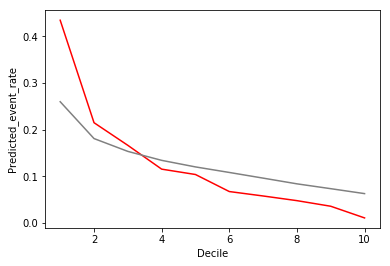

In [78]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [79]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['TARGET'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.7575,0.480444,1515.0,1515.0,0.603105,0.603105,485.0,485.0,0.027733,0.027733,0.5754,0.1,0.1,1
1,9,2000,0.2330,0.209282,466.0,1981.0,0.185510,0.788615,1534.0,2019.0,0.087717,0.115451,0.6732,0.1,0.2,2
2,8,2000,0.1155,0.139913,231.0,2212.0,0.091959,0.880573,1769.0,3788.0,0.101155,0.216606,0.6640,0.1,0.3,3
3,7,2000,0.0475,0.107465,95.0,2307.0,0.037818,0.918392,1905.0,5693.0,0.108932,0.325538,0.5929,0.1,0.4,4
4,6,2000,0.0315,0.087409,63.0,2370.0,0.025080,0.943471,1937.0,7630.0,0.110762,0.436299,0.5072,0.1,0.5,5
5,5,2000,0.0290,0.072878,58.0,2428.0,0.023089,0.966561,1942.0,9572.0,0.111048,0.547347,0.4192,0.1,0.6,6
6,4,2000,0.0140,0.059338,28.0,2456.0,0.011146,0.977707,1972.0,11544.0,0.112763,0.660110,0.3176,0.1,0.7,7
7,3,2000,0.0125,0.047381,25.0,2481.0,0.009952,0.987659,1975.0,13519.0,0.112935,0.773044,0.2146,0.1,0.8,8
8,2,2000,0.0135,0.036607,27.0,2508.0,0.010748,0.998408,1973.0,15492.0,0.112820,0.885865,0.1125,0.1,0.9,9
9,1,2000,0.0020,0.023678,4.0,2512.0,0.001592,1.000000,1996.0,17488.0,0.114135,1.000000,0.0000,0.1,1.0,10


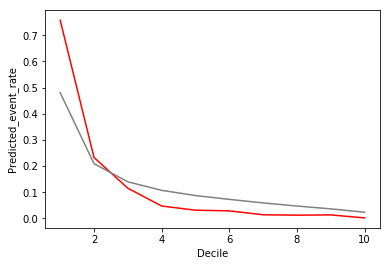

In [80]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [67]:
# Project Conclusion :- 
# Create a decision tree and show it to stakeholders. This will create awareness about the kind of rules that a Tree might 
# come up with
# Now speak about the benefit of ensembles and how they achieve a higher degress of robustness than a single tree
# Now is the time to show that the ensemble is as good if not better than the decison tree
# This way you can first sell the idea of a tree based solution and then sell the final product which is an ensemble of the
# idea you have already sold(decision tree)

In [81]:
df['BALANCE_RANK']=pd.qcut(df['BALANCE'].rank(method='first').values,10,duplicates='drop').codes+1

In [86]:
df.groupby('BALANCE_RANK')['BALANCE'].max()

BALANCE_RANK
1       19258.14
2       47471.92
3       87783.85
4      147752.04
5      231648.02
6      340679.20
7      525551.65
8      809739.31
9     1407968.88
10    8360430.57
Name: BALANCE, dtype: float64

In [87]:
df['BALANCE_RANK_SEGMENT']=np.where(df['BALANCE_RANK']<=2,"Low",(np.where(df['BALANCE_RANK']>=8,"High","Mid")))
df.BALANCE_RANK_SEGMENT.value_counts()

Mid     10000
High     6000
Low      4000
Name: BALANCE_RANK_SEGMENT, dtype: int64

In [88]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_GBM']<9,"Bottom8","Top2")
df.Predicted_Resp_Rank.value_counts()

Bottom8    16000
Top2        4000
Name: Predicted_Resp_Rank, dtype: int64

In [89]:
pd.crosstab(index=df['BALANCE_RANK_SEGMENT'], columns=df['Predicted_Resp_Rank'],values=df['TARGET'],aggfunc='mean')

Predicted_Resp_Rank,Bottom8,Top2
BALANCE_RANK_SEGMENT,,
High,0.027762,0.595577
Low,0.031859,0.490991
Mid,0.037288,0.466830


In [90]:
pd.crosstab(index=df['BALANCE_RANK_SEGMENT'], columns=df['Predicted_Resp_Rank'],values=df['TARGET'],aggfunc='count')

Predicted_Resp_Rank,Bottom8,Top2
BALANCE_RANK_SEGMENT,,
High,5367,633
Low,2668,1332
Mid,7965,2035
